### Importing necessary libraries

In [31]:
import cv2
import os
import matplotlib.pyplot as plt
import shutil
from IPython.display import display, Image

%matplotlib inline

##### Define the video file path and output directory

In [32]:
video_path = "/content/watch.mp4"
output_folder = "extracted_frames"

if not os.path.isfile(video_path):
    raise FileNotFoundError(f"The video file '{video_path}' does not exist.")

##### Created output folder and opened the file using OpenCV

In [33]:
if os.path.exists(output_folder):
    shutil.rmtree(output_folder)  # Remove the folder if it already exists
os.makedirs(output_folder, exist_ok=True)

cap = cv2.VideoCapture(video_path)
if not cap.isOpened():
    raise Exception("Failed to open the video file.")

##### Get video properties

In [34]:
fps = cap.get(cv2.CAP_PROP_FPS)
interval = int(fps * 1)  # Extract a frame every x seconds

frame_count = 0
frame_index = 0
frame_paths = []

##### Extract frames

In [35]:
while True:
    ret, frame = cap.read()
    if not ret:
        break

    if frame_count % interval == 0:
        frame_name = f"frame_{frame_index:04d}.jpg"
        frame_path = os.path.join(output_folder, frame_name)
        cv2.imwrite(frame_path, frame)
        frame_paths.append(frame_path)
        frame_index += 1

    frame_count += 1

cap.release()

##### Display the list of extracted frames

In [36]:
print("Extracted frames:")
for path in frame_paths:
    print(path)

Extracted frames:
extracted_frames/frame_0000.jpg
extracted_frames/frame_0001.jpg
extracted_frames/frame_0002.jpg
extracted_frames/frame_0003.jpg
extracted_frames/frame_0004.jpg
extracted_frames/frame_0005.jpg
extracted_frames/frame_0006.jpg
extracted_frames/frame_0007.jpg
extracted_frames/frame_0008.jpg
extracted_frames/frame_0009.jpg
extracted_frames/frame_0010.jpg


##### Display the list of extracted frames

In [37]:
print("Extracted frames:")
for path in frame_paths:
    print(path)

Extracted frames:
extracted_frames/frame_0000.jpg
extracted_frames/frame_0001.jpg
extracted_frames/frame_0002.jpg
extracted_frames/frame_0003.jpg
extracted_frames/frame_0004.jpg
extracted_frames/frame_0005.jpg
extracted_frames/frame_0006.jpg
extracted_frames/frame_0007.jpg
extracted_frames/frame_0008.jpg
extracted_frames/frame_0009.jpg
extracted_frames/frame_0010.jpg


##### Show the first extracted frame

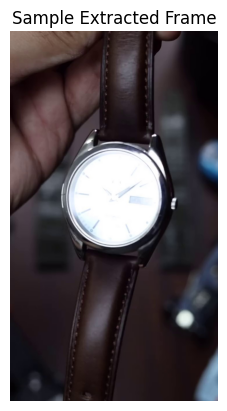

In [38]:
img = cv2.imread(frame_paths[0])
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Sample Extracted Frame")
plt.axis("off")
plt.show()

Initialize threshold for Laplacian variance computation

In [39]:
quality_scores = []
threshold = 100.0  # Adjust based on quality requirement

In [40]:
for frame_path in frame_paths:
    # Read the frame
    image = cv2.imread(frame_path)
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Calculate the Laplacian variance
    laplacian_var = cv2.Laplacian(gray, cv2.CV_64F).var()
    # Store the score if above threshold
    if laplacian_var > threshold:
        quality_scores.append((frame_path, laplacian_var))

    print(f"Frame: {frame_path}, Laplacian Variance: {laplacian_var}")

Frame: extracted_frames/frame_0000.jpg, Laplacian Variance: 34.687241750759554
Frame: extracted_frames/frame_0001.jpg, Laplacian Variance: 312.7857127853664
Frame: extracted_frames/frame_0002.jpg, Laplacian Variance: 281.0067621195475
Frame: extracted_frames/frame_0003.jpg, Laplacian Variance: 15.636351975386823
Frame: extracted_frames/frame_0004.jpg, Laplacian Variance: 28.24049870241895
Frame: extracted_frames/frame_0005.jpg, Laplacian Variance: 380.2481428918722
Frame: extracted_frames/frame_0006.jpg, Laplacian Variance: 1.0783517794844542
Frame: extracted_frames/frame_0007.jpg, Laplacian Variance: 105.13012543266673
Frame: extracted_frames/frame_0008.jpg, Laplacian Variance: 141.42481101401526
Frame: extracted_frames/frame_0009.jpg, Laplacian Variance: 298.51317448933963
Frame: extracted_frames/frame_0010.jpg, Laplacian Variance: 1.8847026787228047


#### Show the scores

In [41]:
print("\nFrames with scores above the threshold:")
for path, score in quality_scores:
    print(f"{path}: {score}")


Frames with scores above the threshold:
extracted_frames/frame_0001.jpg: 312.7857127853664
extracted_frames/frame_0002.jpg: 281.0067621195475
extracted_frames/frame_0005.jpg: 380.2481428918722
extracted_frames/frame_0007.jpg: 105.13012543266673
extracted_frames/frame_0008.jpg: 141.42481101401526
extracted_frames/frame_0009.jpg: 298.51317448933963


#### Sort the frames by quality score in descending order

In [42]:
quality_scores.sort(key=lambda x: x[1], reverse=True)

print("Sorted Frames by Quality:")
for path, score in quality_scores:
    print(f"{path}: {score}")

Sorted Frames by Quality:
extracted_frames/frame_0005.jpg: 380.2481428918722
extracted_frames/frame_0001.jpg: 312.7857127853664
extracted_frames/frame_0009.jpg: 298.51317448933963
extracted_frames/frame_0002.jpg: 281.0067621195475
extracted_frames/frame_0008.jpg: 141.42481101401526
extracted_frames/frame_0007.jpg: 105.13012543266673


#### Display a sample of original extracted frames

Original Extracted Frames:


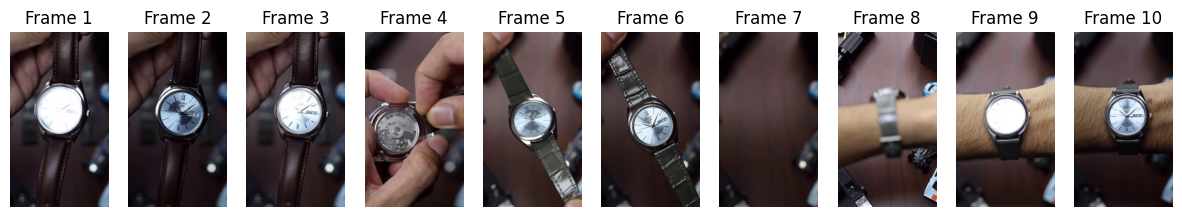

In [43]:
print("Original Extracted Frames:")
fig, axs = plt.subplots(1, min(10, len(frame_paths)), figsize=(15, 10))
for i, path in enumerate(frame_paths[:10]):
    img = cv2.imread(path)
    axs[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axs[i].set_title(f"Frame {i+1}")
    axs[i].axis("off")
plt.show()

#### Display filtered and sorted images

Filtered and Sorted Frames by Quality:


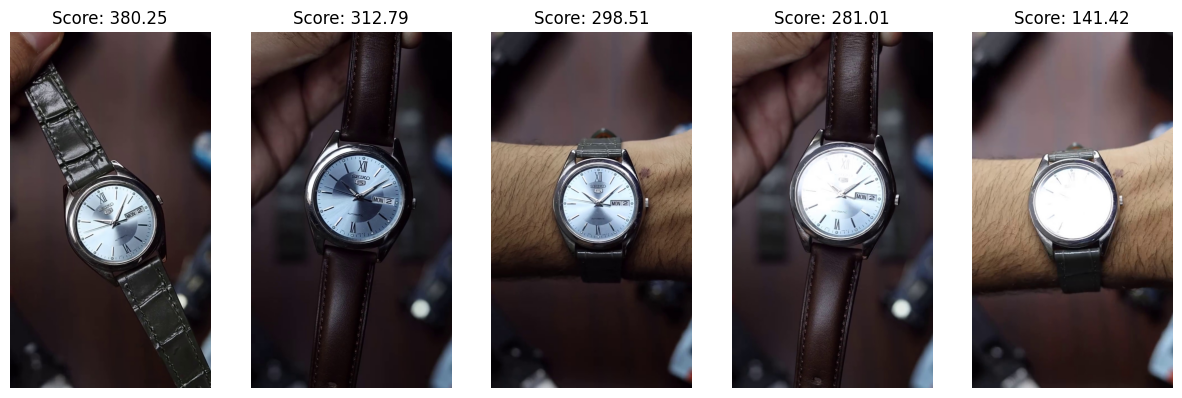

In [44]:
print("Filtered and Sorted Frames by Quality:")
fig, axs = plt.subplots(1, min(5, len(quality_scores)), figsize=(15, 5))
for i, (path, score) in enumerate(quality_scores[:5]):
    img = cv2.imread(path)
    axs[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axs[i].set_title(f"Score: {score:.2f}")
    axs[i].axis("off")
plt.show()